In [2]:
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
import matplotlib.pyplot as plt
import numpy as np

dataset = TUDataset(root='./data/', name='MUTAG')

/home/eigil/miniconda3/envs/adlcv-ex1/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data_loader = DataLoader(dataset, batch_size=188)

data = next(iter(data_loader))

In [4]:
data

DataBatch(edge_index=[2, 7442], x=[3371, 7], edge_attr=[7442, 4], y=[188], batch=[3371], ptr=[189])

In [5]:
graph_node_count_histogram = np.zeros(30)
graph_node_count = np.zeros(188)
for i in range(188):
    n_nodes = sum(data["batch"] == i)
    graph_node_count[i] = n_nodes
    graph_node_count_histogram[n_nodes] += 1

normalized_graph_node_count_histogram = graph_node_count_histogram / len(data["y"])

In [6]:
sum(normalized_graph_node_count_histogram)

1.0

<BarContainer object of 30 artists>

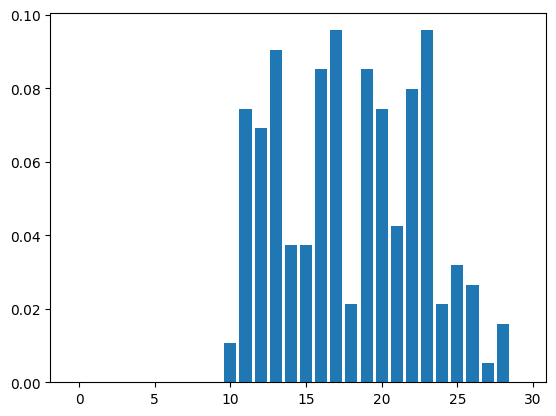

In [7]:
plt.bar(range(0, 30), normalized_graph_node_count_histogram)

In [8]:
from scipy.stats import rv_discrete
distribution = rv_discrete(values=(range(30), normalized_graph_node_count_histogram))
test = distribution.rvs(size=1000)

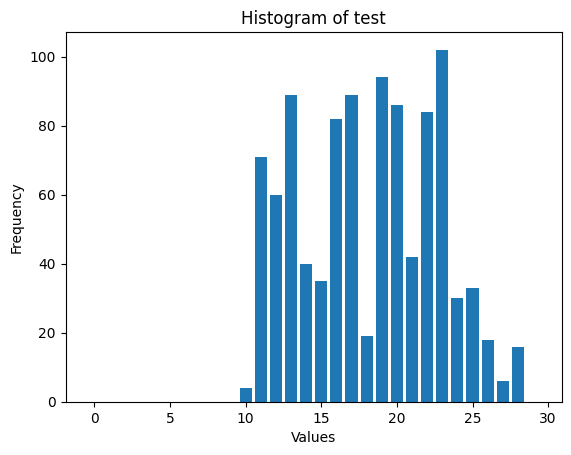

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the histogram
hist, bins = np.histogram(test, bins=range(31))

# Create the bar plot
plt.bar(range(30), hist)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of test')
plt.show()


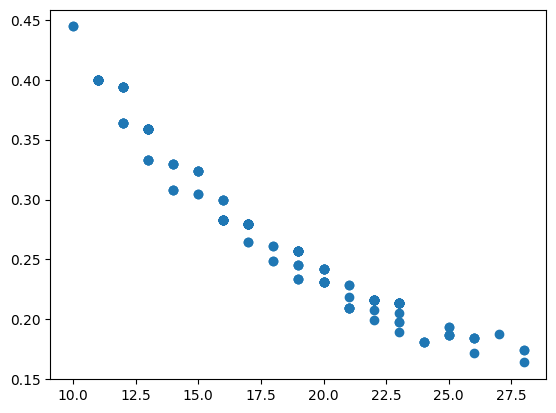

In [10]:
graph_link_counts = np.zeros(188)
for link in data["edge_index"][0]:
    grapp_number = data["batch"][link]
    graph_link_counts[grapp_number] += 1

graph_possible_links = graph_node_count * (graph_node_count - 1) / 2

graph_density = graph_link_counts / graph_possible_links

plt.scatter(graph_node_count, graph_density)
plt.show()

In [11]:
r = np.mean(graph_density)

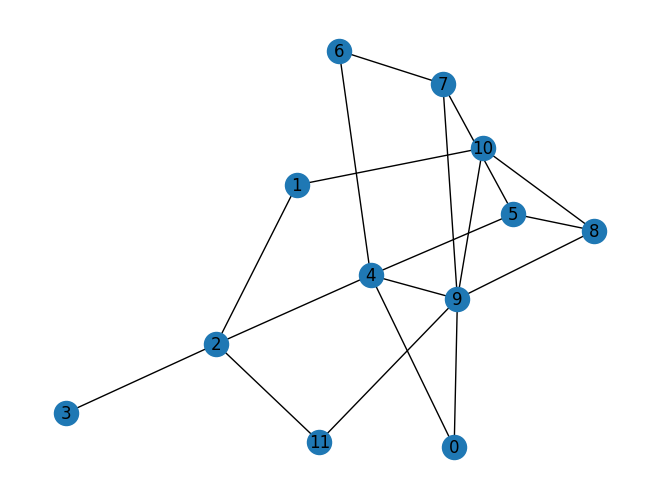

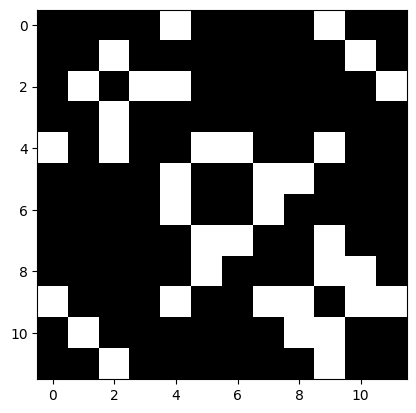

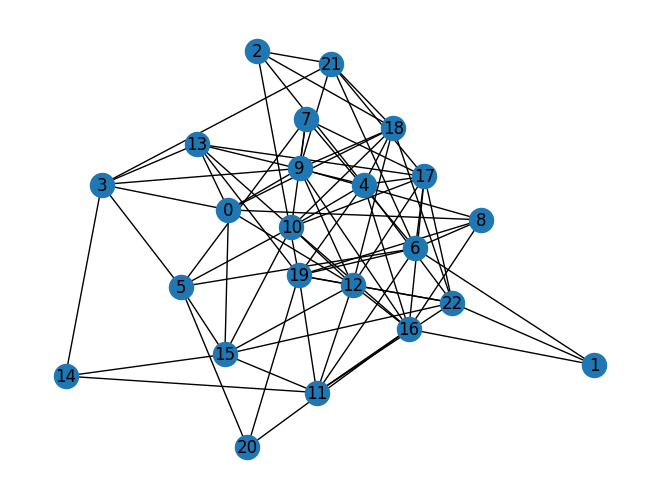

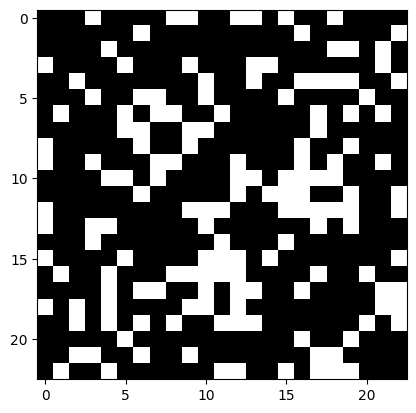

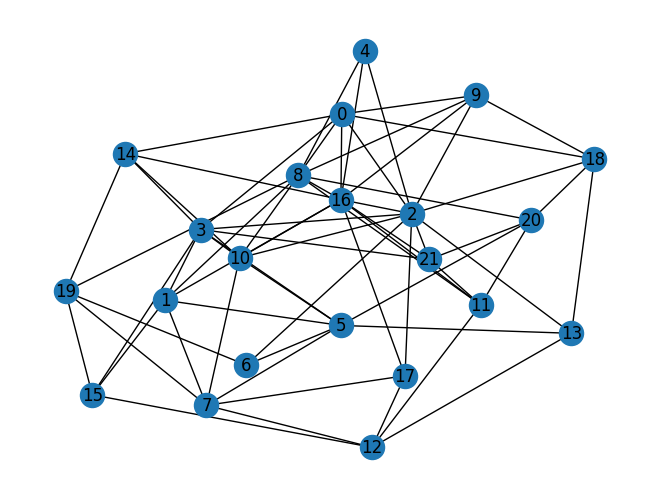

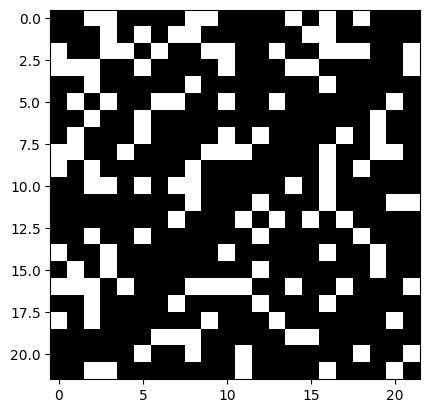

In [23]:
import networkx as nx

def generate_erdos_graphs(N_graphs):
    global r
    global distribution

    graphs = []
    N_list = distribution.rvs(size=N_graphs)
    for N in N_list:
        G = nx.erdos_renyi_graph(N, r)
        graphs.append(G)
    return graphs

graphs = generate_erdos_graphs(3)

for G in graphs:
    nx.draw(G, with_labels=True)
    plt.show()

    adj_matrix = nx.adjacency_matrix(G)

    # Convert the adjacency matrix to a numpy array
    adj_matrix_array = adj_matrix.toarray()

    # Print the adjacency matrix
    plt.imshow(adj_matrix_array, cmap='gray')
    plt.show()
